In [20]:
import matplotlib.pyplot  as plt
from pathlib import Path
import pandas as pd
import os
import numpy as np
from keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


In [ ]:
os.chdir("../")
os.chdir("../")
os.getcwd()

In [14]:
processed_test_path = Path("./mask_recognition/data/processed/processed_test_data.npz")
mask_recognition_model_path = Path("./artefacts/mask_recognition_model.h5")
prepared_test_path = Path("./mask_recognition/data/numpy_data/prepared_test_data.npz")

processed_test_data = np.load(processed_test_path)
test_X = processed_test_data["image"]
test_y = processed_test_data["label"]

prepared_test_data = np.load(prepared_test_path)
test_images = prepared_test_data["image"]
test_labels = prepared_test_data["label"]

mask_recognition_model = load_model(mask_recognition_model_path)
mask_recognition_model.evaluate(test_X, test_y)

31/31 [==============================] - 2s 57ms/step - loss: 0.0791 - accuracy: 0.9819


[0.0791151225566864, 0.9818548560142517]

In [15]:
prediction = mask_recognition_model.predict(test_X).round().reshape(-1)

31/31 [==============================] - 2s 54ms/step


### Classification report

In [19]:
print(classification_report(test_y, prediction))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       483
           1       0.99      0.97      0.98       509

    accuracy                           0.98       992
   macro avg       0.98      0.98      0.98       992
weighted avg       0.98      0.98      0.98       992



### Matrice de confusion

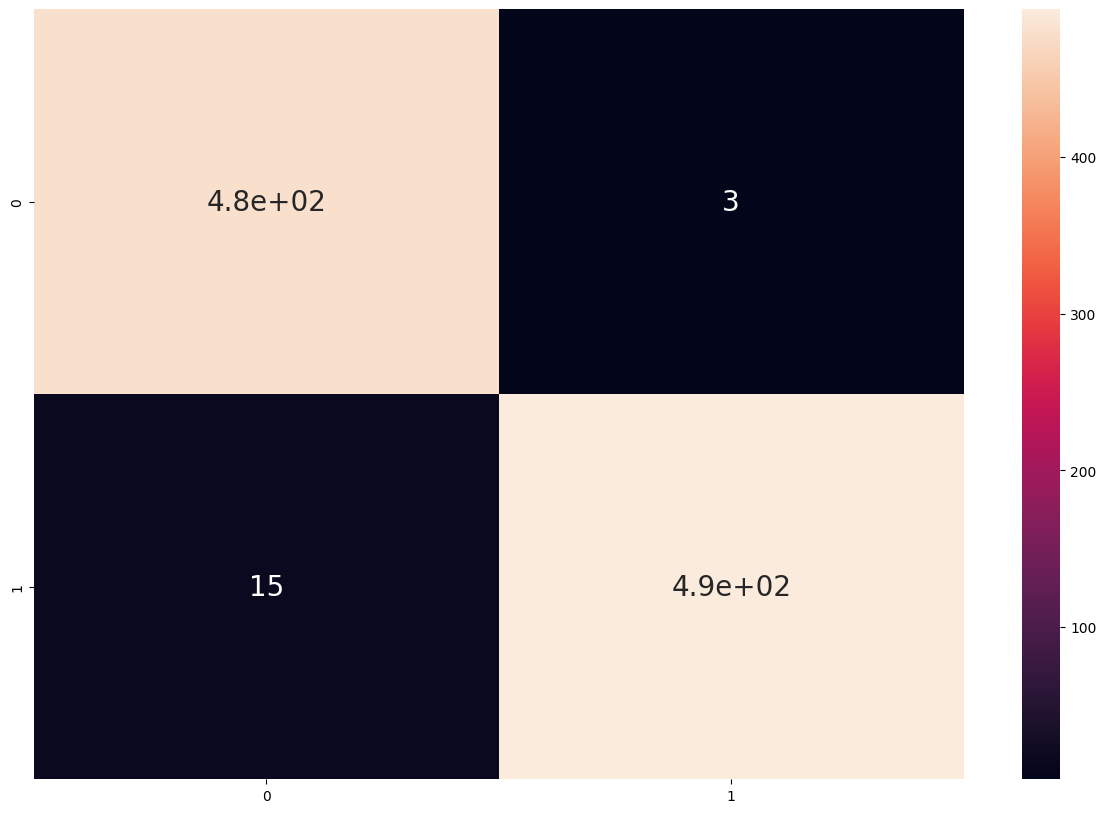

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(test_y, prediction), annot=True, annot_kws={"size":20})
plt.savefig("./artefacts/confusion_matrix.png")
plt.show()

#### Résultats de la reconnaissance de masque sur les images de test

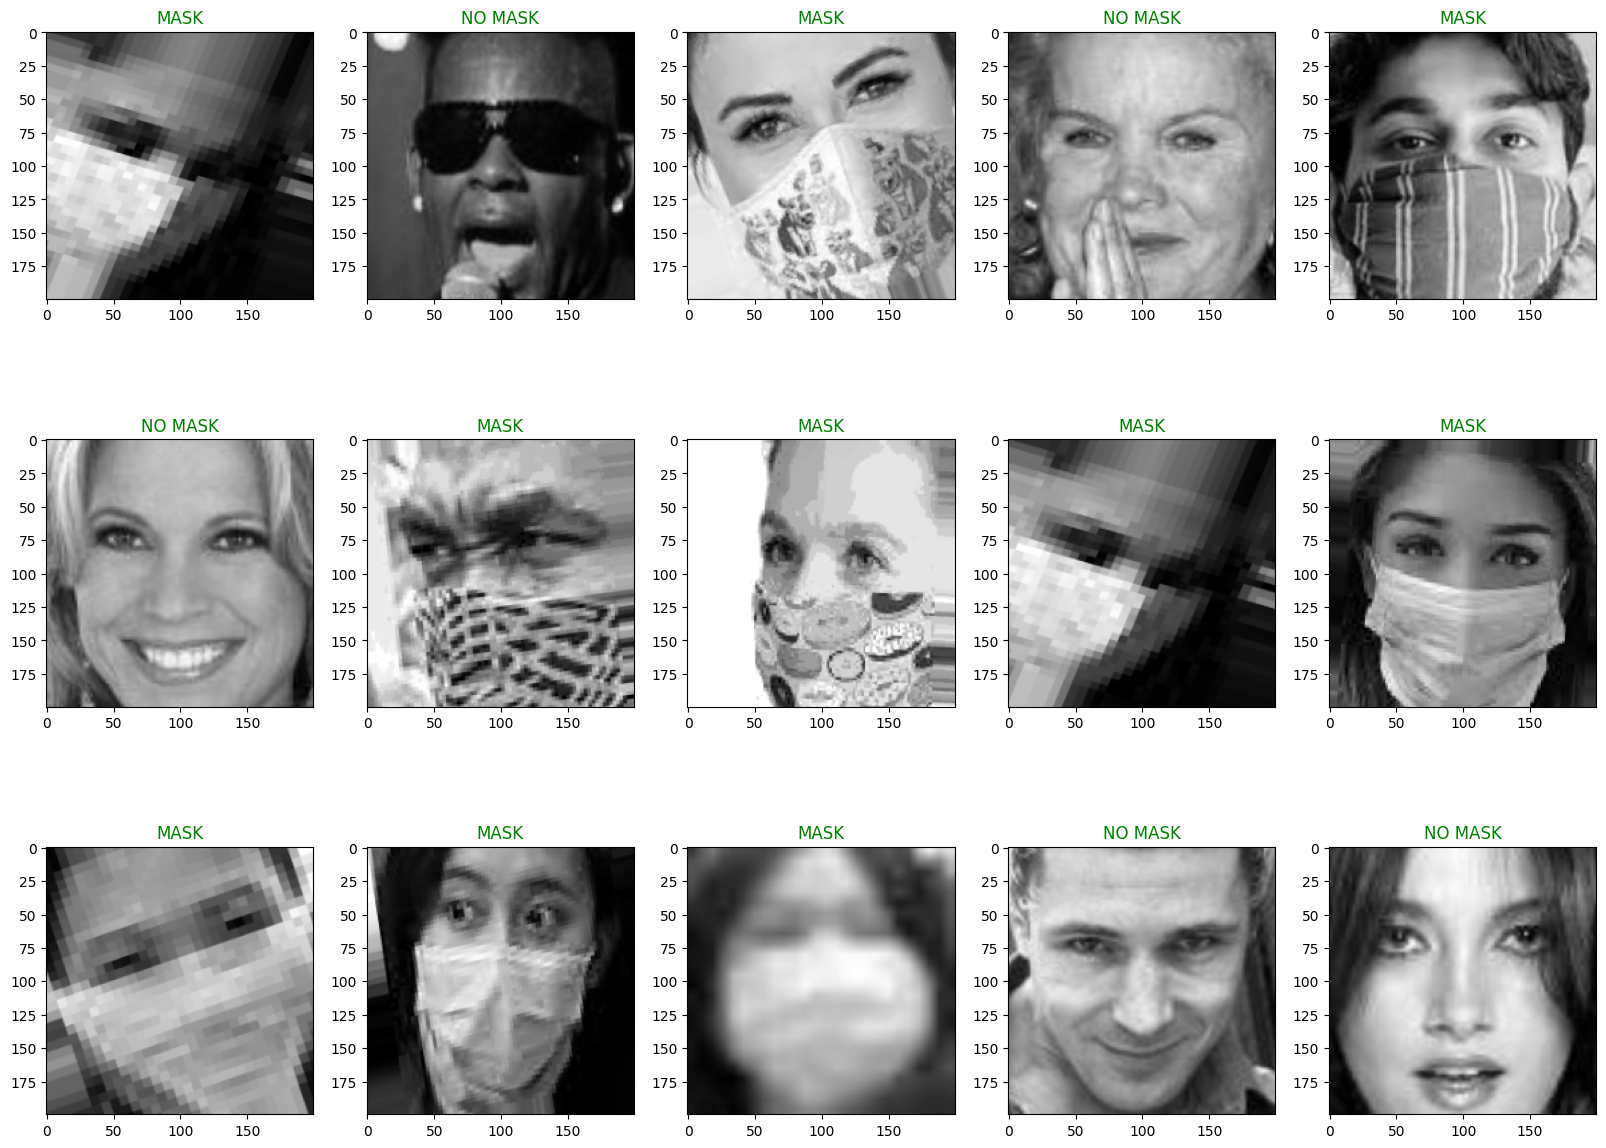

In [17]:
plt.figure(figsize=(20, 15))
for i in range(0, 15):
    w = np.random.randint(test_images.shape[0])
    plt.subplot(3, 5, i+1)
    plt.imshow(test_images[w], cmap="gray")           
    plt.title(("NO MASK" if prediction[w]==1 else "MASK"), color = ("green" if prediction[w]==test_y[w] else "red"))
    plt.savefig("./artefacts/prediction.png")      